## Import dataset

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ddos_benign = pd.read_csv('dataset/ddos-benign.csv', index_col=0)

In [3]:
ddos_benign.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Benign,DDoS
0,0.000000,54.0,6.0,64.0,27.544001,27.544001,0.0,0.0,1.0,0.0,...,54.0,8.309410e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,0,1
1,18.664119,11797.6,8.8,57.0,9.275587,9.275587,0.0,0.0,0.0,0.0,...,202.1,7.497478e-03,5.5,16.944570,163.160557,18660.776147,0.9,38.50,1,0
2,8.757505,238939.4,6.0,130.8,103.329283,103.329283,0.0,0.0,0.0,0.0,...,1079.6,4.785204e-03,5.5,54.625138,1186.874235,913519.907229,0.8,38.50,1,0
3,7.217731,735358.9,6.0,97.6,198.804797,198.804797,0.0,0.0,0.0,0.0,...,1233.4,1.665216e+08,13.5,38.857698,1083.982344,593108.840764,1.0,244.60,1,0
4,0.172738,31629.0,17.0,64.0,5215.204329,5215.204329,0.0,0.0,0.0,0.0,...,50.0,8.348742e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,0,1


In [4]:
ddos_benign.drop('DDoS', inplace=True, axis=1)
ddos_benign.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Benign
0,0.000000,54.0,6.0,64.0,27.544001,27.544001,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.309410e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,0
1,18.664119,11797.6,8.8,57.0,9.275587,9.275587,0.0,0.0,0.0,0.0,...,115.371936,202.1,7.497478e-03,5.5,16.944570,163.160557,18660.776147,0.9,38.50,1
2,8.757505,238939.4,6.0,130.8,103.329283,103.329283,0.0,0.0,0.0,0.0,...,839.246820,1079.6,4.785204e-03,5.5,54.625138,1186.874235,913519.907229,0.8,38.50,1
3,7.217731,735358.9,6.0,97.6,198.804797,198.804797,0.0,0.0,0.0,0.0,...,765.377938,1233.4,1.665216e+08,13.5,38.857698,1083.982344,593108.840764,1.0,244.60,1
4,0.172738,31629.0,17.0,64.0,5215.204329,5215.204329,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.348742e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55,0


In [5]:
X = ddos_benign.drop('Benign', inplace=False, axis=1)
# Label will be 1 if benign, 0 if not.
y = ddos_benign['Benign']

In [6]:
X.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,54.0,6.0,64.0,27.544001,27.544001,0.0,0.0,1.0,0.0,...,54.000000,0.000000,54.0,8.309410e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55
1,18.664119,11797.6,8.8,57.0,9.275587,9.275587,0.0,0.0,0.0,0.0,...,152.466270,115.371936,202.1,7.497478e-03,5.5,16.944570,163.160557,18660.776147,0.9,38.50
2,8.757505,238939.4,6.0,130.8,103.329283,103.329283,0.0,0.0,0.0,0.0,...,1515.034286,839.246820,1079.6,4.785204e-03,5.5,54.625138,1186.874235,913519.907229,0.8,38.50
3,7.217731,735358.9,6.0,97.6,198.804797,198.804797,0.0,0.0,0.0,0.0,...,764.072103,765.377938,1233.4,1.665216e+08,13.5,38.857698,1083.982344,593108.840764,1.0,244.60
4,0.172738,31629.0,17.0,64.0,5215.204329,5215.204329,0.0,0.0,0.0,0.0,...,50.000000,0.000000,50.0,8.348742e+07,9.5,10.000000,0.000000,0.000000,0.0,141.55


In [7]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Benign, dtype: int64

## Cross Validation

In [8]:
from sklearn.model_selection import train_test_split

# Split into training and temporary set (70% training, 30% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=4, stratify=y)

# Split the temporary set into testing and validation sets (50% testing, 50% validation). Final is 70%-15%-15%
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=4, stratify=y_temp)

## Normalization

Min-Max Scaling: Scales the values so they fall within a defined range (0 and 1). The formula is:
$$\frac{x - \min(x)}{\max(x) - \min(x)}$$ 

Adjust the numerical values in the dataset to a common scale without distorting differences in the ranges of values.

This is going to be implemented after splitting the data to prevent bias.

In [9]:
scaler = MinMaxScaler()
# Normalize and return a dataframe
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.fit_transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [10]:
dataframes = [X_train, X_val, X_test, y_train, y_val,y_test]

# Prints the shape of each dataframe
for df in dataframes:
    print(df.shape)

(1537473, 46)
(329459, 46)
(329458, 46)
(1537473,)
(329459,)
(329458,)


In [11]:
X_train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,2.534199e-04,0.192244,0.352941,0.252782,6.561040e-06,6.561040e-06,0.0,0.0,0.0,0.0,...,0.070588,0.105781,0.057529,9.999921e-01,0.892857,0.228631,0.105863,0.009840,1.00,1.000000
1,4.458333e-04,0.600787,0.352941,0.922099,7.975087e-06,7.975087e-06,0.0,0.0,0.0,0.0,...,0.001772,0.000000,0.001772,1.513181e-12,0.321429,0.014930,0.000000,0.000000,0.00,0.153941
2,0.000000e+00,0.000006,0.352941,0.254372,2.127310e-07,2.127310e-07,0.0,1.0,0.0,1.0,...,0.000886,0.000000,0.000886,5.004866e-01,0.607143,0.007884,0.000000,0.000000,0.00,0.576970
3,3.412660e-08,0.000071,0.348824,0.249046,6.406257e-07,6.406257e-07,0.0,0.0,0.0,0.0,...,0.063403,0.051998,0.060225,5.004318e-01,0.607143,0.212598,0.052000,0.002496,0.95,0.576970
4,4.479874e-04,0.065426,0.352941,0.416932,1.546762e-06,1.546762e-06,0.0,0.0,0.0,0.0,...,0.042768,0.065176,0.107311,9.999431e-01,0.892857,0.162616,0.065269,0.004611,1.00,1.000000


## Models Implementation

### Logistic Regression - Raw

Accuracy: 99.641837%


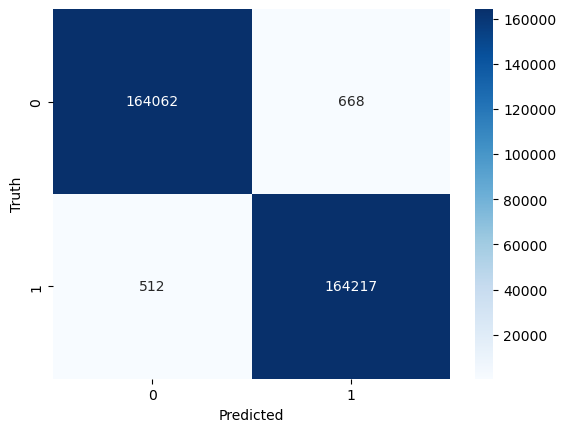

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings

warnings.filterwarnings('ignore')

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict classes on the validation set
y_pred = model.predict(X_val)

# Compute the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy*100:.6f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Logistic Regression - Using Grid Search for better hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Some penalties may not work with some solvers, that's why we choose a few parameters only.
# Also: Higher number of params, higher wait.
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# GridSearchCV object
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit using Grid search
grid_search.fit(X_train, y_train)

# Get best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model generated
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best score: ", best_score)
print("Best model (ready to use for predict): ", best_model)

Best Hyperparameters:  {'C': 10, 'solver': 'newton-cg'}
Best score:  0.9969872641767357
Best model (ready to use for predict):  LogisticRegression(C=10, solver='newton-cg')


In [14]:
# TDB: Implementar un predict al modelo si es necesario, usando el validation y test set.
# Recordar que GridSearchCV hace su propio cross validation solo con el train set en este caso.
# Otra opcion puede ser entrenarlo directamente con X, y, sin usar cross validation ya que lo hace internamente.

### Support Vector Machine - Raw

Accuracy: 99.590541%


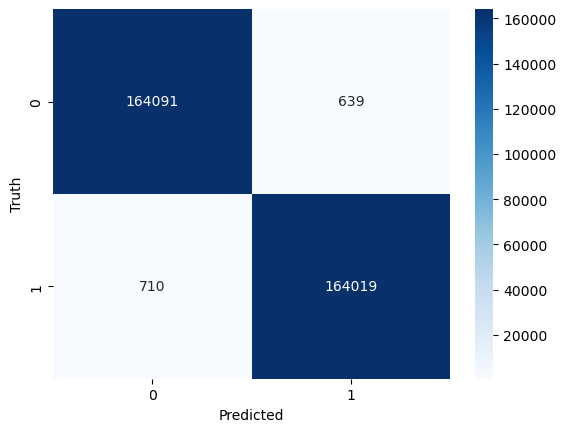

In [15]:
from sklearn.svm import SVC

# Create a SVM model
model = SVC(C=1.0, kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Predict classes on the validation set
y_pred = model.predict(X_val)

# Compute the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy*100:.6f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Support Vector Machine - Using Grid Search for better hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear', 'rbf', 'sigmoid'],
}

# Create the SVM model
svm = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model generated
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best score: ", best_score)
print("Best model (ready to use for predict): ", best_model)

### KNN - Raw

Accuracy: 99.992108%


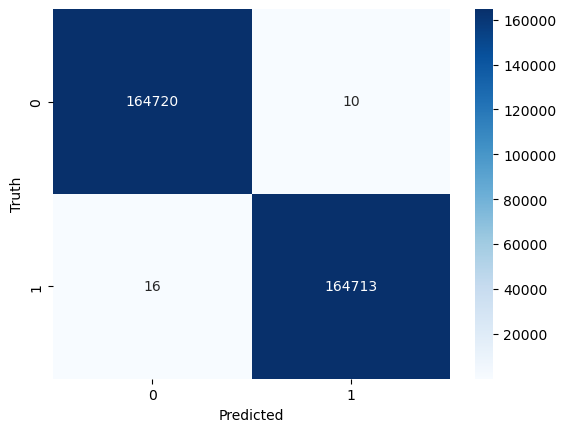

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean', weights='uniform')

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = knn.predict(X_val)

# Compute the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy*100:.6f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### KNN - Using Grid Search for better hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create the KNN model
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model generated
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best score: ", best_score)
print("Best model (ready to use for predict): ", best_model)

### XGBoost - Raw

Accuracy: 99.999696%


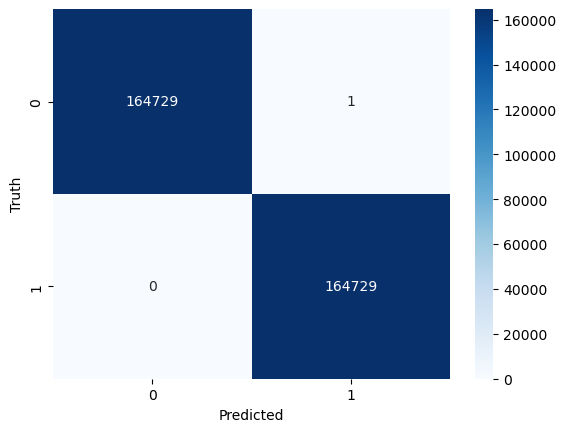

In [16]:
from xgboost import XGBClassifier

# Create a XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Predict classes on the validation set
y_pred = model.predict(X_val)

# Compute the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

print(f'Accuracy: {accuracy*100:.6f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### XGBoost - Using Grid Search for better hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'n_estimators': [100, 200, 300]
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the data to the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model generated
best_model = grid_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best score: ", best_score)
print("Best model (ready to use for predict): ", best_model)

## Feature importance

In [17]:
import numpy as np

# Obtain the features importances
importances = model.feature_importances_

# Name of the features
feature_names = X.columns

# List of tuples of (name, importance)
features_and_importances = zip(feature_names, importances)

# Order the list
sorted_features_and_importances = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

# Print the importance of each feature
for feature, importance in sorted_features_and_importances:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: rst_count, Importance: 0.9134103655815125
Feature: flow_duration, Importance: 0.02601645141839981
Feature: syn_flag_number, Importance: 0.010758806020021439
Feature: fin_flag_number, Importance: 0.007764346897602081
Feature: ack_count, Importance: 0.007591035682708025
Feature: rst_flag_number, Importance: 0.007316214963793755
Feature: HTTP, Importance: 0.004033728968352079
Feature: Number, Importance: 0.0036985385231673717
Feature: IAT, Importance: 0.003151330165565014
Feature: Weight, Importance: 0.0027545795310288668
Feature: ICMP, Importance: 0.0026282230392098427
Feature: fin_count, Importance: 0.002592278178781271
Feature: Variance, Importance: 0.002578331623226404
Feature: Magnitue, Importance: 0.0012932908721268177
Feature: Protocol Type, Importance: 0.0007352422107942402
Feature: HTTPS, Importance: 0.0006375619559548795
Feature: psh_flag_number, Importance: 0.0005485458532348275
Feature: Header_Length, Importance: 0.0004985610721632838
Feature: Tot sum, Importance: 0.0

In [2]:
# Next step: Remove columns with low importance
#df = df.drop(columns=columns_to_remove)